In [245]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

import matplotlib.pyplot as plt
%matplotlib inline

In [246]:
Hitters = pd.read_csv('Hitters.csv',index_col = 0)
Hitters = Hitters.dropna()

#omit the categorical predictors
Hitters = Hitters.drop(['League','Division','NewLeague'],axis = 1)

In [247]:
X = Hitters.drop (['Salary'],axis = 1)
Y = Hitters['Salary']

#standardize the predictors
X_stand = StandardScaler().fit_transform(X)

## Lasso

(0.0044668359215096348,
 223872.11385683378,
 -446.16176643093502,
 577.2622471642851)

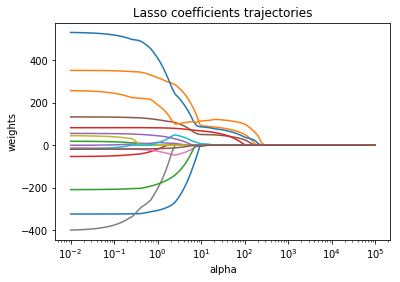

In [253]:
alphas  = 10**np.linspace(5,-2,100)

lasso = Lasso(max_iter=10000)
l_coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_stand, Y)
    l_coefs.append(lasso.coef_)


ax1 = plt.gca()
ax1.plot(alphas, l_coefs)
ax1.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients trajectories')
plt.axis('tight')

In [255]:
#find the final three predictors that remain in the model
for c in l_coefs:
    if sum(c!= 0) ==3:
        print(X.columns[c!=0])

Index(['Hits', 'CRuns', 'CRBI'], dtype='object')


In [256]:
# split data to train and test set
X_train, X_test , Y_train, Y_test = cross_validation.train_test_split(X_stand, Y, train_size=0.5, random_state=42)

In [257]:
lassocv = LassoCV(cv=10, max_iter=100000)
lassocv.fit(X_train, Y_train)

print("The best optimal value for Lasso is", lassocv.alpha_)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_stand, Y)

pd.Series(lasso.coef_, index=X.columns)

The best optimal value for Lasso is 29.762008728


AtBat        0.000000
Hits        81.452795
HmRun        0.000000
Runs         0.000000
RBI          0.000000
Walks       45.912318
Years        0.000000
CAtBat       0.000000
CHits        0.000000
CHmRun       0.000000
CRuns       72.790041
CRBI       119.447638
CWalks       0.000000
PutOuts     52.533934
Assists     -0.000000
Errors      -0.000000
dtype: float64

### 1.1

'Hits', 'CRuns' and 'CRBI' are the final three predictors that remain in the model. The best optimal value for Lasso is 29.76 and there are 5 predictors are left in the model which are 'Hits', 'Walks','CRuns','CRBI' and 'PutOuts'.

## Ridge

(0.0044668359215096348,
 223872.11385683378,
 -446.95270062316058,
 574.98965236520758)

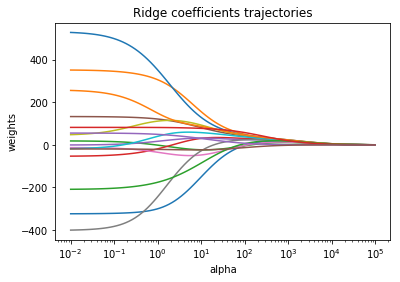

In [258]:
ridge = Ridge()
r_coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_stand, Y)
    r_coefs.append(ridge.coef_)
    
ax2 = plt.gca()
ax2.plot(alphas, r_coefs)
ax2.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients trajectories')
plt.axis('tight')


In [259]:
ridgecv = RidgeCV(alphas=alphas, cv = 10)
ridgecv.fit(X_train, Y_train)
print("The best optimal value for Ridge is", ridgecv.alpha_)

ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X_stand, Y)

pd.Series(ridge.coef_, index=X.columns)

The best optimal value for Ridge is 242.012826479


AtBat      13.067564
Hits       35.871097
HmRun       5.717608
Runs       26.777169
RBI        23.287188
Walks      33.955445
Years       8.995419
CAtBat     25.734960
CHits      34.920239
CHmRun     30.890645
CRuns      35.950906
CRBI       36.307586
CWalks     17.123916
PutOuts    43.053212
Assists     3.849826
Errors     -7.060176
dtype: float64

### 1.2

The best optimal value for Ridge is 242.01.

### 2

In general, if a model has less flexibility then it will have high bias and low variance(it may underfitting). On the other hand when we use a more flexible model, variance will increase and the bias will decrease(it may overfitting). So we need to find the balance between bias and vairance since the best model requires low vairance as well as low bias. Therefore we refered it as bias-variance trade-off to obtain a method with a little more bias but much lower variance, and vice visa. 

In the trade-off, the regularization trades increased bias to the model for reduced variance.

In the ridge and lasso models, the penalty parameter lambda controls the penalty strength. Hence larger lambda will result smaller coefficients which means a higher bias. When $\lambda$ = 0, then the lasso simply gives the least squares fit which has low bias, and when $\lambda$ becomes sufficiently large, it gives the null model in which all coefficient estimates equal zero which has a high bias.